# Projects

Now you've seen  a variety of different features of Matplotlib and have seen a number of different examples. Now, you'll have the opportunity to practice what you've learned so far on some projects whose scope, contents and complexity is more similar to what you might encounter in the real world. In many of these cases, the basic data will be provided for you in lists. In others, you will be asked to write simple code to generate the data in an appopriate format.  It is up to you to take what you've learned and produce plots which are informative, clear, and attractive.

There are a variety of projects you can complete in any order. To guide you, the skills tested in each project are indicated so you can attempt projects that test what you're most interested in or feel you need to practice most.

For many of these exercises, they are complex or open-ended enough that there is not a single correct answer. However, there is a sample solution below eachx, showing one possible way to do it.

## Lorenz Equations

Skills
* Subplots
* Line Plots
* 3D plots

It's possible to simulate the changing state of a system over time. As an example, we'll consider the [Lorenz system of equations](https://en.wikipedia.org/wiki/Lorenz_system), which arises in simplified models of a number of physical systems including lasers, electric circuits and chemical reactions. The system of equations governing the derivative of its three variables ($x$, $y$ and $z$) are as follows:

$
\frac{\textrm{d}x(t)}{\textrm{d}t} = \sigma(y - x)\\
\frac{\textrm{d}y(t)}{\textrm{d}t} = x(\rho - z) - y\\
\frac{\textrm{d}z(t)}{\textrm{d}t} = xy - \beta z
$

$\beta$, $\sigma$ and $\rho$ are parameters which define the behaviour of the system. By picking values of 10, 8/3 and 28, we make the system  chaotic, which means we expect some interesting results.

In the cell below, create a figure with four subplots. The first three should show the progression of the variables $x(t)$, $y(t)$, and $z(t)$. The fourth should show the trajectory of the system on a 3D set of axes (i.e. draw the locations of $x$, $y$ and $z$ as a line plot on a set of 3D axes).

In [ ]:
import numpy as np
from scipy.integrate import odeint

# This code calculates the values assocaited with the Lorenz system and returns the times and values of x, y and z as 4 lists
# There's no need to look at this code (unless you're interested)
def derivative(vec, t, sigma, beta, rho):
  result = np.zeros(3)

  result[0] = sigma * (vec[1] - vec[0])
  result[1] = vec[0] * (rho - vec[2]) -vec[1]
  result[2] = vec[0] * vec[1] - beta * vec[2]

  return(result)

t = np.arange(0, 20, 0.01)

initial_value = np.array([1,2,3])

sigma = 10
beta = 8/3
rho = 28

time_series = odeint(derivative, initial_value, t, args = (sigma, beta, rho))

t = list(t)
x = list(time_series[:,0])
y = list(time_series[:,1])
z = list(time_series[:,2])

# Write your code illustrating the progression of the system as a function of time below
# The lists containing the values of time, x, y and z are stored in the variables t, x, y and z respectively








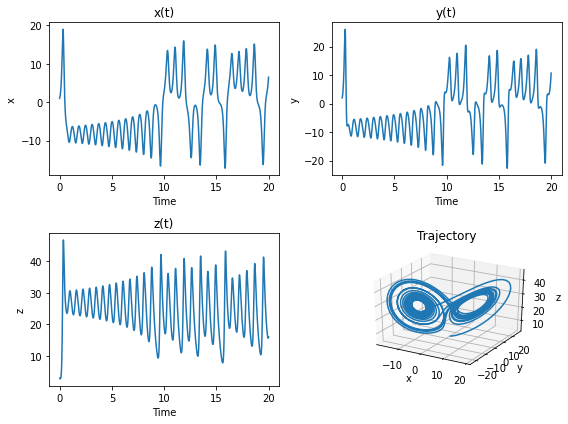

In [28]:
#@title
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# This code calculates the values assocaited with the Lorenz system and returns the times and values of x, y and z as 4 lists
# There's no need to look at this code (unless you're interested)
def derivative(vec, t, sigma, beta, rho):
  result = np.zeros(3)

  result[0] = sigma * (vec[1] - vec[0])
  result[1] = vec[0] * (rho - vec[2]) -vec[1]
  result[2] = vec[0] * vec[1] - beta * vec[2]

  return(result)

t = np.arange(0, 20, 0.01)

initial_value = np.array([1,2,3])

sigma = 10
beta = 8/3
rho = 28

time_series = odeint(derivative, initial_value, t, args = (sigma, beta, rho))

t = list(t)
x = list(time_series[:,0])
y = list(time_series[:,1])
z = list(time_series[:,2])

# Write your code illustrating the progression of the system as a function of time below
# The lists containing the values of time, x, y and z are stored in the variables t, x, y and z respectively

# Create an empty set of subplots as we'll want to add 2D and 3D subplots
fig, axs = plt.subplots(0,0, figsize=(8, 6))

# Add the first subplot which describes x as a function of t
# When using add_subplot, we use 221
# This means we want two rows and two columns of subplots and we're add the top-left one
ax_x = fig.add_subplot(221)
ax_x.set_xlabel("Time")
ax_x.set_ylabel("x")
ax_x.set_title("x(t)")
ax_x.plot(t,x)

# Add the second subplot which describes y as a function of t
# Use 222 in add_subplot to add it to the top-right
ax_y = fig.add_subplot(222)
ax_y.set_xlabel("Time")
ax_y.set_ylabel("y")
ax_y.set_title("y(t)")
ax_y.plot(t,y)

# Add the third subplot which describes z as a function of t
# Use 223 in add_subplot to add it to the bottom-left
ax_z = fig.add_subplot(223)
ax_z.set_xlabel("Time")
ax_z.set_ylabel("z")
ax_z.set_title("z(t)")
ax_z.plot(t,z)

# Add the fourth subplot which shows the trajectory of the system
# Use 224 in add_subplot to add it to the bottom-right
# Set the projection to be 3D
ax_xyz = fig.add_subplot(224, projection='3d')
# Slightly increase the "camera" distance to ensure the axes labels are all visible
# With the default value of 10 the z-axis label would be cut off
ax_xyz.dist = 12
ax_xyz.plot3D(x,y,z)
ax_xyz.set_xlabel("x")
ax_xyz.set_ylabel("y")
ax_xyz.set_zlabel("z")
ax_xyz.set_title("Trajectory")

fig.tight_layout()